# Crime data analysis

### I am trying to find which variables might have a higher correlation with crime data
The dataset I used for the analysis is 2011 Counties Data https://www.census.gov/library/publications/2011/compendia/usa-counties-2011.html?fbclid=IwAR2KsVfEDeUjvFvbtBSJTILVmYDRAjsJ6gnu-Q29YPMMXlZlfIZ6rdgOvpI#EAN

## The dataset 
- The dataset have 96 xls files in total and is about 1.2 Gb.
- The dataset contains a lot of items belonging to 39 different subjects including crime, housing, age and so on.
- In each subject, there are columns of different data types. Most of the columns are absolute values of the county, but there are also median, percentage and ranking values.

### Combining the input data files with the metadata files to get a better interpretation

- filename: the file names of the .xls files in each subject
- Subj: the abbreviation of the subject
- Subject: the full description of the subject
- numcolumns: the number of combined columns of all the xls files in each subject
- unit_indicator: the unit set of all the columns in the subject (used as an partial indicator whether to normalize the column by population or not) 

In [26]:
filedf2.head()

,filename,Subj,Subject,numcolumns,unit_indicator
0,[AFN01.xls],AFN,Accommodation and Food Services - NAICS only,36,"[ABS, TH$]"
1,"[AGE01.xls, AGE03.xls, AGE02.xls, AGE04.xls]",AGE,Age,371,"[ABS, YRS, PCT]"
2,"[AGN01.xls, AGN02.xls]",AGN,Agriculture - NAICS,120,"[ABS, ACR, DOL, TH$, YRS]"
3,[AGS01.xls],AGS,Agriculture - SIC,24,"[ABS, ACR, DOL, TH$, YRS]"
4,"[ANC03.xls, ANC02.xls, ANC01.xls]",ANC,Ancestry,202,[ABS]


## Data preprocessing

- The different xls files belonging to the same subject are first combined to from a dataframe
- Drop certain rows and columns and normalized specific colomns with absolute total numbers by population
- Normalize the dataframe along columns
- Do pca analysis of the new dataframe, keep several transformed columns which account for > 90% variance
- Combine these selected columns and store in a new file.

In [2]:
import pandas as pd
datadf = pd.read_pickle('./data111original.pkl')
datadf.head()

,AFN_0,AGE_0,AGN_0,AGN_1,AGN_2,AGN_3,AGS_0,AGS_1,AGS_2,ANC_0,...,SBO_1,SEX_0,SPR_0,VET_0,VST_0,VST_1,WAT_0,WAT_1,WTN_0,WTN_1
STCOU,,,,,,,,,,,,,,,,,,,,,
1001,-202600.077831,-7.920116,-513924.704041,148978.186121,-143451.073283,-116748.037475,-263137.194758,-10626.650310,-68321.486093,-8.465841,...,-23212.876717,-17.198228,-36177.957461,-32.017865,-5.132884,-4.831752,-7353.700803,816.184794,897888.883995,-1.963687e+06
1003,390688.590957,-8.171547,-394168.992526,-12319.385022,56179.341194,-99268.740537,-188827.652332,-46739.701342,11219.399006,-8.727254,...,9003.434011,-11.480096,78538.515277,-32.020212,-5.461030,-2.544575,-8538.664024,955.747188,326621.873505,-9.363584e+05
1005,-310652.495611,-7.485384,-479247.129953,2032.292757,-80256.185783,8632.770008,-144938.282618,32966.990754,-51056.595289,-8.032878,...,-51623.243307,40.843480,-46416.574644,-32.035878,-4.624335,-1.566627,-8467.100777,686.441598,858234.076563,-1.967464e+06
1007,-325907.002593,-7.664504,-750466.798963,162371.360389,-160714.378372,-99019.236031,-306760.686756,50400.779864,-100459.720254,-8.248122,...,-63948.100373,27.880367,-51895.292513,-32.052538,-4.836873,-0.959898,-8829.159486,994.812875,880305.066452,-1.927519e+06
1009,-309717.395914,-7.865915,-712138.363244,-133285.053616,93591.902813,-59217.598955,-261586.483903,-80560.839449,-32372.449107,-8.562947,...,-56971.523398,0.840807,-28325.686559,-32.048699,-5.182958,-6.265309,-8133.673785,471.531093,937437.334348,-1.959741e+06


### The colinearity between selected features after preprocessing

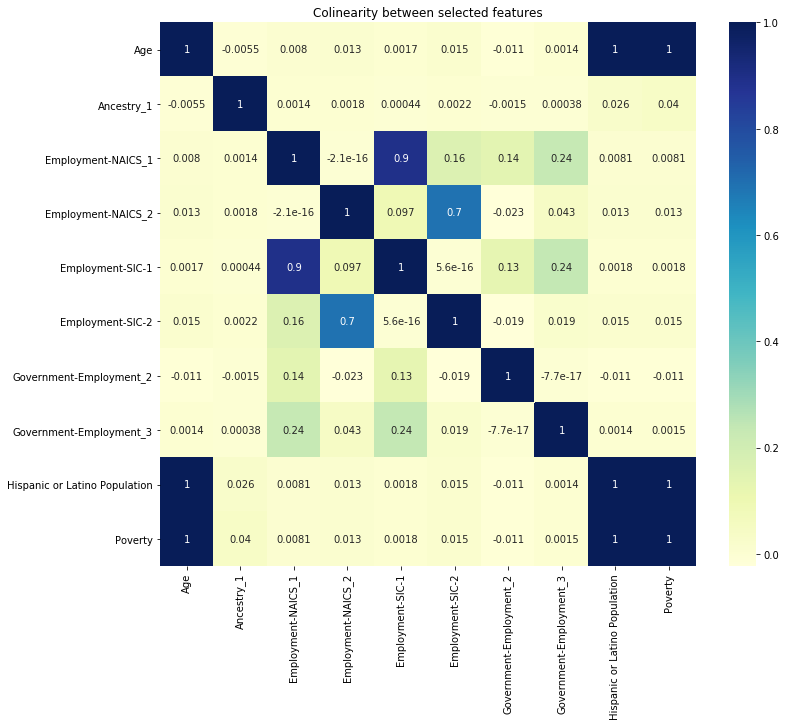

In [8]:
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

columnsnames = ['Age','Ancestry_1','Employment-NAICS_1','Employment-NAICS_2','Employment-SIC-1','Employment-SIC-2','Government-Employment_2','Government-Employment_3','Hispanic or Latino Population','Poverty']
columnstouse = ['AGE_0','ANC_1','EMN_1','EMN_2','EMS_1','EMS_2','GEN_2','GEN_3','HIS_0','PVY_0']
corrmat = datadf.corr()

datanew = datadf[columnstouse]
f, ax = plt.subplots(figsize=(12, 10))
ax.xaxis.label.set_fontsize(20)
ax.set_title('Colinearity between selected features')
sns.heatmap(datanew.corr(), vmax=1, cmap="YlGnBu",annot=True, yticklabels=columnsnames, xticklabels=columnsnames);